In [87]:
import numpy as np


## Prepare the data for the calculations

In [88]:
# Define the start and end values, as well as the increment
start_value = 0.01
end_value = 1000
increment = 0.01

In [89]:
# Create an array of data points
data_points = np.arange(start_value, end_value + increment, increment)

In [90]:
# Print the first few data points as an example
print(data_points[:10])  # This will print the first 10 data points
print(len(data_points))


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
100000


### (a) Compute σ2 of the population D. Let’s call σ2 the true variance of the population D.

In [91]:
meanofallpoints = sum(data_points)/len(data_points)
print(meanofallpoints)

500.005


In [92]:
def calculate_variance(data_points):
    # Calculate the mean (average) of the data points
    mean = sum(data_points) / len(data_points)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data_points]

    # Calculate the variance as the average of the squared differences
    variance = sum(squared_diff) / len(data_points)

    return variance


In [93]:

result = calculate_variance(data_points)
print("Variance:", result)


Variance: 83333.333325


True variance of population : 83333.333325

#### Random generator

In [94]:
import time

class SimpleRandom:
    def __init__(self, seed=None):
        if seed is None:
            seed = int(time.time() * 1000000) % 1000000
        self.state = seed

    def rand(self):
        a = 1664525
        c = 1013904223
        m = 2**32
        self.state = (a * self.state + c) % m
        return self.state
    def randrange(self, start, stop):

        range_size = stop - start
        rand_num = self.rand() % range_size
        return start + rand_num

    def generaterandomnuniquenumbers(self, n, func):
        if n <= 0:
            return set()

        unique_numbers = set()
        while len(unique_numbers) < n:
            unique_numbers.add(func())

        return unique_numbers

    def generaterandomnrangeuniquenumbers(self, n, start, stop):
        if n <= 0 or start >= stop:
            return set()

        range_size = stop - start
        if n > range_size:
            n = range_size

        unique_numbers = []
        while len(unique_numbers) < n:
            num = self.randrange(start, stop)
            if num not in unique_numbers:
                unique_numbers.append(num)

        return unique_numbers



In [95]:
random_generator = SimpleRandom()
print(random_generator)

#### Use sampling with replacement, to randomly sample 50 points {y1, . . . , y50} from the population D, i.e., for 1 ≤ i ≤ 50, yi ∈ D. Compute s1, s2 and s3 defined as

### Choosing random 50 points

In [96]:
fiftypoints= []
totalpoints = 100000

In [97]:
# Choose 50 unique indexes without repetition
while len(fiftypoints) < 50 :
    index = random_generator.rand() % totalpoints
    # if index not in fiftyindex:
    fiftypoints.append(data_points[index])


In [98]:
print(fiftypoints)

[763.78, 436.85, 233.79999999999998, 980.71, 39.019999999999996, 81.21000000000001, 111.60000000000001, 956.59, 445.46, 231.81, 629.72, 461.11, 894.14, 985.9300000000001, 536.0, 56.19, 52.26, 523.73, 205.79999999999998, 457.35, 951.82, 269.21, 466.32, 803.79, 688.18, 138.85, 352.76, 149.26999999999998, 573.98, 810.09, 267.04, 544.67, 343.3, 360.05, 736.2, 828.39, 840.62, 175.29, 385.84, 256.43, 701.46, 357.25, 910.6800000000001, 327.35, 660.54, 171.85, 53.76, 808.19, 736.42, 428.37]


In [99]:
for i in range(50):
  print(fiftypoints[i])
  


763.78
436.85
233.79999999999998
980.71
39.019999999999996
81.21000000000001
111.60000000000001
956.59
445.46
231.81
629.72
461.11
894.14
985.9300000000001
536.0
56.19
52.26
523.73
205.79999999999998
457.35
951.82
269.21
466.32
803.79
688.18
138.85
352.76
149.26999999999998
573.98
810.09
267.04
544.67
343.3
360.05
736.2
828.39
840.62
175.29
385.84
256.43
701.46
357.25
910.6800000000001
327.35
660.54
171.85
53.76
808.19
736.42
428.37


In [100]:
meanoffiftypoints = sum(fiftypoints) /50
print( meanoffiftypoints)

483.62059999999985


In [101]:
numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]

In [102]:
print(numerators)

[78489.28940836007, 2187.4890243599843, 62410.33218435993, 247097.87159236017, 197669.6935203599, 161934.29099235986, 138399.3268243599, 223700.05333636017, 1456.2313923599904, 63408.578272359926, 21345.03468036005, 506.7271123599928, 168526.1777763601, 252314.73332836022, 2743.6015443600154, 182696.91781635987, 186071.9672323599, 1608.7639683600132, 77184.28578435995, 690.1444243599911, 219210.67816036017, 45971.90539235995, 299.3107603599952, 102508.44469636006, 41844.54812836004, 118866.76662435988, 17124.496632359966, 111790.32372035991, 8164.821168360029, 106582.26913636012, 46907.15629635993, 3727.029240360013, 19689.870784359955, 15269.693184359961, 63796.3533043601, 118865.93917636009, 127448.57160036011, 95067.75889635993, 9561.045736359976, 51615.56872835993, 47454.00419236008, 15969.528544359962, 182379.73112836017, 24420.500424359947, 31300.474096360038, 97200.9070243599, 184780.13543235988, 105345.29541636012, 63907.53664036006, 3052.6288003599834]


In [103]:
numerator_after_addsquare_mean = sum(numerators)

In [104]:
print(numerator_after_addsquare_mean)

4150564.8032819997


In [105]:
s1square = numerator_after_addsquare_mean/51
print("s1square is " , s1square)

s1square is  81383.6235937647


In [106]:
s2square = numerator_after_addsquare_mean/50
print("s2square is " , s2square)

s2square is  83011.29606564


In [107]:
s3square = numerator_after_addsquare_mean/ 49
print("s3square is " , s3square)

s3square is  84705.40414861224


-----------------------------------------------------------------------------------------------------------------------------

In [108]:
averagescoreofs1_2 = 0
averagescoreofs2_2 = 0
averagescoreofs3_2 = 0


In [109]:
import matplotlib.pyplot as plt

In [110]:
# Number of iterations
num_iterations = 10  # You can change this to the desired number of iterations

In [111]:
# Initialize average scores
avg_s1_squared = 0
avg_s2_squared = 0
avg_s3_squared = 0

In [112]:
avg_s1_squared_list = []
avg_s2_squared_list = []
avg_s3_squared_list = []

In [113]:
# Perform multiple iterations
for iteration in range(num_iterations):
    # Perform sampling with replacement to randomly select 50 points from the population
    fiftypoints= []
    totalpoints = 100000
    sample_size = 50
    # Choose 50 unique indexes without repetition
    while len(fiftypoints) < 50 :
        index = random_generator.rand() % totalpoints
        # if index not in fiftyindex:
        fiftypoints.append(data_points[index])

    meanoffiftypoints = sum(fiftypoints) /50
    numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
    numerator_after_addsquare_mean = sum(numerators)
    
    # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
    s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
    s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
    s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
    avg_s1_squared_list.append(s1_squared)
    avg_s2_squared_list.append(s2_squared)
    avg_s3_squared_list.append(s3_squared)

    # Update the average scores
    avg_s1_squared = (avg_s1_squared * iteration + s1_squared) / (iteration + 1)
    print("value of average , avg_s1_squared " ,avg_s1_squared )
    avg_s2_squared = (avg_s2_squared * iteration + s2_squared) / (iteration + 1)
    print( "value of average , avg_s2_squared " ,avg_s2_squared )
    avg_s3_squared = (avg_s3_squared * iteration + s3_squared) / (iteration + 1)
    print( "value of average , avg_s3_squared " ,avg_s3_squared )
    



value of average , avg_s1_squared  82512.80775250979
value of average , avg_s2_squared  84163.06390755998
value of average , avg_s3_squared  85880.67745669385
value of average , avg_s1_squared  83339.7772649804
value of average , avg_s2_squared  85006.57281027999
value of average , avg_s3_squared  86741.40082681633
value of average , avg_s1_squared  82499.47044762093
value of average , avg_s2_squared  84149.45985657333
value of average , avg_s3_squared  85866.79577201362
value of average , avg_s1_squared  81161.57600756864
value of average , avg_s2_squared  82784.80752772
value of average , avg_s3_squared  84474.29339563267
value of average , avg_s1_squared  81496.32738432157
value of average , avg_s2_squared  83126.253932008
value of average , avg_s3_squared  84822.70809388573
value of average , avg_s1_squared  85163.40293818302
value of average , avg_s2_squared  86866.67099694668
value of average , avg_s3_squared  88639.460200966
value of average , avg_s1_squared  84155.22967824651
v

In [114]:
# Print the average scores after multiple iterations
print("Average s^2_1:", avg_s1_squared)
print("Average s^2_2:", avg_s2_squared)
print("Average s^2_3:", avg_s3_squared)


Average s^2_1: 84573.4996676157
Average s^2_2: 86264.96966096801
Average s^2_3: 88025.47924588573


### (d) Use three different scatter plots to visualize the change in Avgs2 i , for 1 ≤ i ≤ 3 over increasing number of iterations and compare it with σ2 the true variance of D.

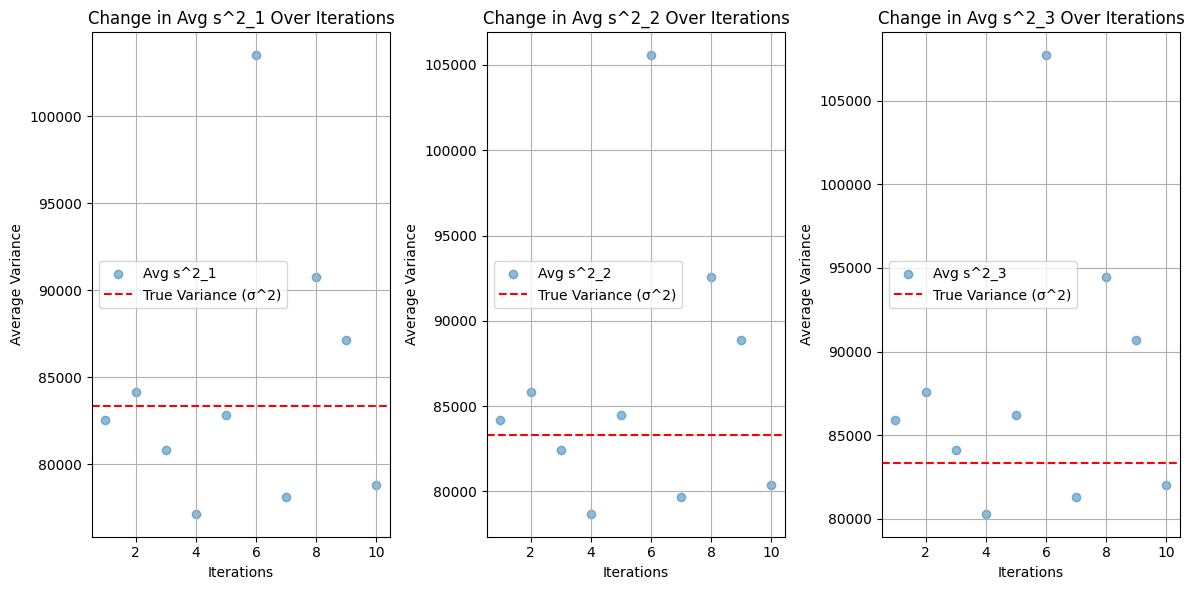

In [116]:
plt.figure(figsize=(12, 6))

# Scatter plot for Avg s^2_1
plt.subplot(131)
plt.scatter(iterations, avg_s1_squared_list, label='Avg s^2_1', alpha=0.5)
plt.axhline(y=result, color='r', linestyle='--', label='True Variance (σ^2)')
plt.xlabel('Iterations')
plt.ylabel('Average Variance')
plt.title('Change in Avg s^2_1 Over Iterations')
plt.legend()
plt.grid(True)

# Scatter plot for Avg s^2_2
plt.subplot(132)
plt.scatter(iterations, avg_s2_squared_list, label='Avg s^2_2', alpha=0.5)
plt.axhline(y=result, color='r', linestyle='--', label='True Variance (σ^2)')
plt.xlabel('Iterations')
plt.ylabel('Average Variance')
plt.title('Change in Avg s^2_2 Over Iterations')
plt.legend()
plt.grid(True)

# Scatter plot for Avg s^2_3
plt.subplot(133)
plt.scatter(iterations, avg_s3_squared_list, label='Avg s^2_3', alpha=0.5)
plt.axhline(y=result, color='r', linestyle='--', label='True Variance (σ^2)')
plt.xlabel('Iterations')
plt.ylabel('Average Variance')
plt.title('Change in Avg s^2_3 Over Iterations')
plt.legend()
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# PART D NOT DONE